In [187]:
import numpy as np
import scipy as sc
import scipy.fftpack as sft
import scipy.integrate as sci
import matplotlib.pyplot as plt

(-10.0, 10.0)

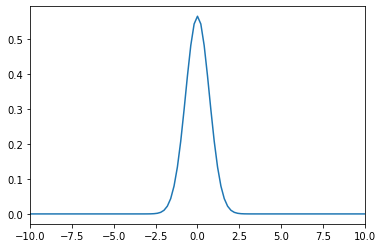

In [223]:
xmin = -1000
xmax = 1000.2
dx = 0.2
ko =1
x = np.arange(xmin,xmax,dx)
psi = np.exp(1j*ko*x)*np.exp(-x**2/2)                 # Defining travelling gaussian function 
pd_1 = abs(psi)**2 
norm = 1 / np.sqrt(sci.simps(pd_1,x))
psi_N = norm*psi
prob_den_initial = abs(psi_N)**2
plt.plot(x,prob_den_initial)
plt.xlim(-10,10)

In [224]:
N = len(x)
freq = sft.fftfreq(N,dx)
k = 2*np.pi*freq
ke_k = 0.5*k**2

In [225]:
V = -x                     # defining potenitial dependance with respect to space
Nt = 50
dt = 0.1

In [226]:
for i in np.arange(Nt):
    psi_N_k = sft.fft(psi_N)                      # FT to momentum domain 
    psi_N_k_dt = np.exp(-1j*ke_k*dt/2)*psi_N_k    # delata t Time evolution through 1st KE operator
    psi_N_i = sft.ifft(psi_N_k_dt)                # IFT to position space
    psi_N_i_pe = np.exp(-1j*V*dt)*psi_N_i         # delata t Time evolution through PE operator
    psi_N_k2 = sft.fft(psi_N_i_pe)                # FT to momentum space
    psi_N_k2_dt = np.exp(-1j*ke_k*dt/2)*psi_N_k2  # delata t Time evolution through 2nd KE operator
    psi_N = sft.ifft(psi_N_k2_dt)                 # IFT to postion space

(-20.0, 90.0)

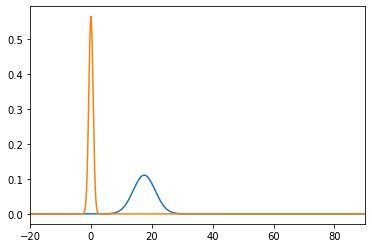

In [227]:
prob_den_final = abs(psi_N)**2
prob_final = sci.simps(psi_N,x)
plt.plot(x,prob_den_final)
plt.xlim(-20,90)
plt.plot(x,prob_den_initial)
plt.xlim(-20,90)

In [228]:
# TESTING EHRENFEST THEOREM
expectation_x = sci.simps(prob_den_final*x,x)
expectation_x_2 = sci.simps(prob_den_final*x**2,x)
variance = np.sqrt(expectation_x_2 - expectation_x**2)
print("width at 60 percent height =",variance)                             
print("expectation value at Nt atomic unit time =",expectation_x)       # Mean position of gaussian curve at Nt atomic unit time

width at 60 percent height = 3.6055512754641708
expectation value at Nt atomic unit time = 17.50000000000858
